# DAO Index Analysis Toolkit

Hello and welcome to the DAO Index Analysis Toolkit (DIAT).

This notebook is for analyzing and visualizing assessment data and other datasets from the DAO Index data repository.

---

Author: Charles Adjovu

Contact: [ledgerback@gmail.com](mailto:ledgerback@gmail.com)


# Libraries


## Downloading Libraries

Uncomment the block below if the libraries are not already installed in your environment

In [ ]:
'''
!pip install pandas
!pip install datetime
!pip install sklearn
!pip install seaborn
!pip install plotly
!pip install numpy
!pip install matplotlib
'''

## Importing Libraries

In [2]:
# Import Pandas for data manipulation
import pandas as pd

# Import datetime
from datetime import date

# Import preporcessing for label encoding
from sklearn import preprocessing

# Import Seaborn, Plotly and Matplotlib for visualization
import seaborn as sns

import plotly.express as px

import matplotlib.pyplot as plt

import plotly.graph_objects as go

# import ascii_letters
from string import ascii_letters

# Import numpy
import numpy as np


# Variables

In [3]:
# Today's date
today = date.today()

# Dictionary for the total for each principle
prin_total = {
      'Broad Stakeholder Participation': 1300.0,
      'Cross-border Coordination': 300.0,
      'Practicing DAO Cooperativism': 1100.0,
      'Cultural Patterns and Brand': 200.0,
      'Information & Data Transparency': 1100.0,
      'DAO2DAO': 200.0,
      'Organizational Technology': 400.0,
      'Human-centered Algorithmic Governance': 300.0
}

# Labelencoder from sklearn to encode text responses as numeric values
le = preprocessing.LabelEncoder()

# DataFrame for re-combined assessments dataset
df_ast_norm = pd.DataFrame()

# Setting style for Seaborn
sns.set(rc={'figure.figsize':(20, 20)})

sns.set_style("whitegrid", {'axes.grid' : False})

# Functions

In [4]:
def normalize(df):

  '''
  ---------------------------
  Parameters
  ---------------------------
  df: Pandas DataFrame
    DataFrame with scores for each Principle


  ---------------------------
  Returns
  ---------------------------
  Nothing

  '''

  for prin, total in prin_total.items():

    if prin in list(df['Principle']):

      df['Points-normalized'] = (df.loc[:, 'Points'] / total) * 100.0

# Importing and Cleaning Datasets

In [5]:
# Importing Assessments Dataset from Github

df_ast = pd.read_csv("https://raw.githubusercontent.com/Ledgerback/DGSF/main/dao_index_assessments-6DAOs-V09-2023-09-25.csv")

# Basic information on the dataset
df_ast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Question-ID        270 non-null    object 
 1   Principle          270 non-null    object 
 2   Indicators         270 non-null    object 
 3   Questions          270 non-null    object 
 4   Points             270 non-null    float64
 5   Plain-english      270 non-null    object 
 6   Explanation        270 non-null    object 
 7   Author             270 non-null    object 
 8   DAO                270 non-null    object 
 9   Search_Difficulty  178 non-null    object 
 10  Document           141 non-null    object 
dtypes: float64(1), object(10)
memory usage: 23.3+ KB


## Normalize scores

In [6]:
prin_uq =  list(df_ast['Principle'].unique())

part_df = {}

for prin in prin_uq:

  filtered = df_ast.query('Principle == @prin')

  part_df[prin] = filtered


In [7]:
for key, item in part_df.items():

  normalize(item)

# Bringing the assessments dataset back together

for prin, df_prin in part_df.items():

  df_ast_norm = pd.concat([df_ast_norm, df_prin], ignore_index=True)

<ipython-input-4-c60825a38ba0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points-normalized'] = (df.loc[:, 'Points'] / total) * 100.0
<ipython-input-4-c60825a38ba0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points-normalized'] = (df.loc[:, 'Points'] / total) * 100.0
<ipython-input-4-c60825a38ba0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

# Scores



## Points Per DAO & Principle

In [ ]:
df_ast_group = df_ast_norm.groupby(['DAO', 'Principle'], as_index=False).sum(numeric_only=True)

display(df_ast_group)

,DAO,Principle,Points,Points-normalized
0,Gitcoin,Broad Stakeholder Participation,550.0,42.307692
1,Gitcoin,Cross-border Coordination,200.0,66.666667
2,Gitcoin,Cultural Patterns and Brand,200.0,100.000000
3,Gitcoin,DAO2DAO,200.0,100.000000
4,Gitcoin,Human-centered Algorithmic Governance,100.0,33.333333
5,Gitcoin,Information & Data Transparency,500.0,45.454545
6,Gitcoin,Organizational Technology,250.0,62.500000
7,Gitcoin,Practicing DAO Cooperativism,500.0,45.454545
8,MakerDAO,Broad Stakeholder Participation,800.0,61.538462
9,MakerDAO,Cross-border Coordination,100.0,33.333333


## Points Per Principle

In [ ]:
df_ast_group_prin = df_ast_norm.groupby(['Principle'], as_index=False).sum(numeric_only=True)
df_ast_group_prin

,Principle,Points,Points-normalized
0,Broad Stakeholder Participation,3650.0,280.769231
1,Cross-border Coordination,900.0,300.000000
2,Cultural Patterns and Brand,1100.0,550.000000
3,DAO2DAO,1000.0,500.000000
4,Human-centered Algorithmic Governance,850.0,283.333333
5,Information & Data Transparency,3350.0,304.545455
6,Organizational Technology,1550.0,387.500000
7,Practicing DAO Cooperativism,2750.0,250.000000


## Points Per DAO

In [ ]:
df_ast_group_dao = df_ast_norm.groupby(['DAO'], as_index=False).sum(numeric_only = True)
df_ast_group_dao

,DAO,Points,Points-normalized
0,Gitcoin,2500.0,495.716783
1,MakerDAO,3050.0,562.296037
2,Optimism,2750.0,491.724942
3,PrimeDAO,1900.0,377.797203
4,Synthetix,2500.0,450.641026
5,Uniswap,2450.0,477.972028


# Visualizations

## Radar Charts

### Radar Charts for each DAO

In [ ]:
# Need to split per dao, and also use the sum of each DAO instead
for x in df_ast_group['DAO'].unique():

  fig = px.line_polar(df_ast_group.loc[df_ast_group['DAO'] == x],
                      r='Points-normalized',
                      theta='Principle',
                      line_close=True,
                      range_r = [0, 100],
                      title= f"{x}'s Radar Chart for DAO Index V0.9")

  #fig.update_traces(fill='toself')
  # Refer to https://plotly.com/python/figure-labels/

  fig.update_layout(
      title={
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'}
      )

  fig.show()

### Overlay Radar Chart for all DAOs

In [ ]:
fig = px.line_polar(df_ast_group,
                    r="Points-normalized",
                    theta="Principle",
                    color="DAO",
                    line_close=True,
                    title="Overlay Radar Chart for all DAOs with DAO Index V0.9",
                    color_discrete_sequence=px.colors.qualitative.G10,
                    range_r = [0, 100])
fig.show()

fig = px.scatter_polar(df_ast_group,
                       r="Points-normalized",
                       theta="Principle",
                       color="DAO",
                       color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

## Bar Charts

### Cumulative points per question for DAOs

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast,
             y="Points",
             x="Questions",
             color='DAO',
             orientation='v',
             hover_data=["Indicators"],
             height=1500,
             title='Cumulative points per question for DAOs')

fig.show()

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast_norm,
             y="Points-normalized",
             x="Question-ID",
             color='DAO',
             orientation='v',
             hover_data=["Indicators"],
             height=1500,
             title='Cumulative points per question for DAOs')

fig.show()

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast_norm,
             x="Points-normalized",
             y="Question-ID",
             color='DAO',
             orientation='h',
             hover_data=["Indicators"],
             height=1500,
             title='Cumulative points per question for DAOs')

fig.show()

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast,
             x="Points",
             y="Questions",
             color='DAO',
             orientation='h',
             hover_data=["Indicators"],
             height=1500,
             width=3000,
             title='Cumulative points per question for DAOs')

fig.show()

### Cumulative points per principle

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast,
             x="Principle",
             y="Points",
             color='DAO',
             orientation='v',
             hover_data=["Indicators", "Questions"],
             height=1500,
             width=1500,
             title='Cumulative points per Principle')

fig.show()

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast_norm,
             x="Principle",
             y="Points-normalized",
             color='DAO',
             orientation='v',
             hover_data=["Indicators", "Questions"],
             height=1500,
             width=1500,
             title='Cumulative points per Principle')

fig.show()

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast,
             y="Principle",
             x="Points",
             color='DAO',
             orientation='h',
             hover_data=["Indicators"],
             height=1500,
             width=1500,
             title='Cumulative points per Principle for DAOs')

fig.show()

### Overall points for DAOs

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast,
             x="DAO",
             y="Points",
             color='Principle',
             orientation='v',
             hover_data=["Indicators"],
             height=1000,
             width=1000,
             title= f"DAO scores as of {today}")

fig.show()

In [ ]:
# https://plotly.com/python/horizontal-bar-charts/
fig = px.bar(df_ast,
             y="DAO",
             x="Points",
             color='Principle',
             orientation='h',
             hover_data=["Indicators"],
             height=1000,
             width=1000,
             title= f"DAO scores as of {today}")

fig.show()

# Analysis

## Response Correlation

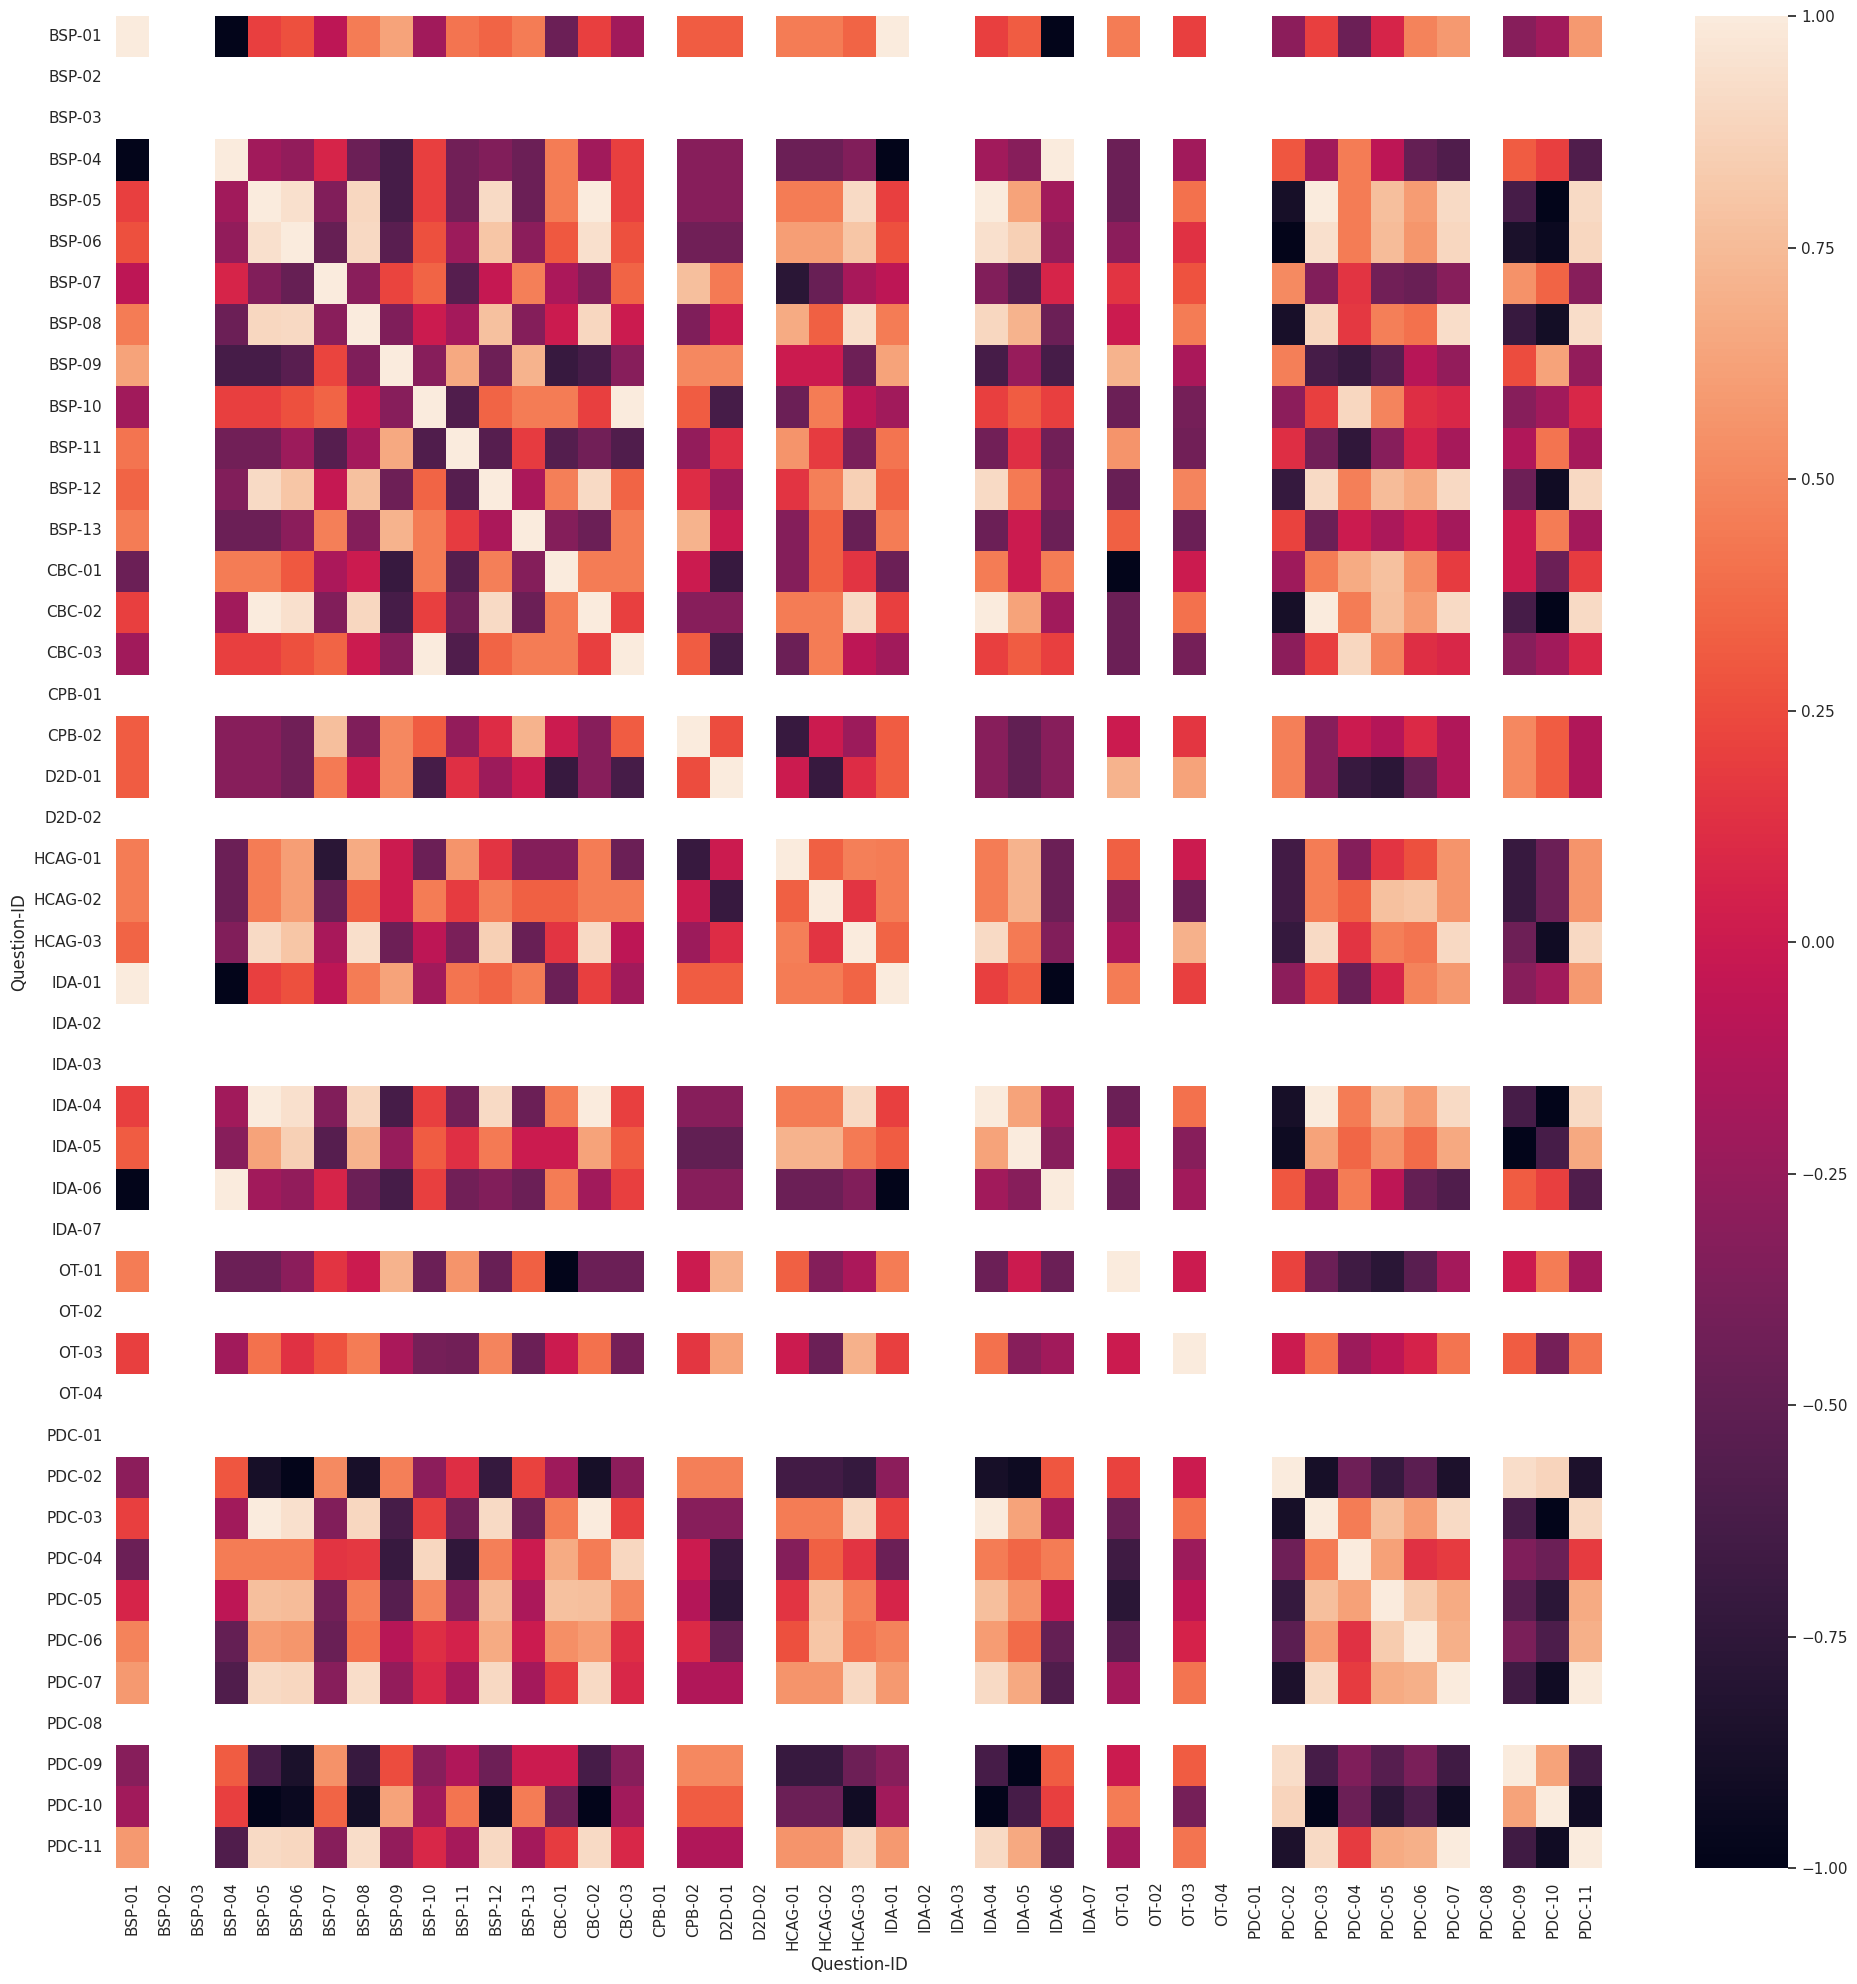

In [ ]:
df_ast_pivot_num = df_ast.pivot(index='DAO', columns='Question-ID', values='Points')

df_ast['Q-label'] = le.fit_transform(df_ast['Plain-english'].values)

df_ast_pivot_text = df_ast.pivot(index='DAO', columns='Question-ID', values='Q-label')

matrix = df_ast_pivot_text.corr(method='pearson')

# Optionally, you can set annot=True
sns.heatmap(matrix, annot=False)

plt.tight_layout()

plt.show()

## Unanswered Questions

### Finding Unanswered Questions

In [8]:
df_ast_unq = df_ast.loc[df_ast['Plain-english'] == 'Does not answer question']

df_ast_unq_gb = df_ast_unq.groupby(['DAO'], as_index=False)

print(df_ast_unq_gb)


### Count of Unanswered Questions

In [10]:
df_ast_unq_uq = df_ast_unq['Question-ID'].value_counts()

df_ast_unq_uqq = pd.DataFrame(df_ast_unq_uq)

df_ast_unq_uqq.reset_index(inplace=True)

df_ast_unq_uqq.rename(columns={"index": "Question-ID",
                               "Question-ID": "Count-Unanswerable"},
                      inplace=True)

df_ast_unq_uqq

,Question-ID,Count-Unanswerable
0,BSP-02,6
1,BSP-03,6
2,PDC-08,6
3,BSP-01,5
4,BSP-10,5
5,CBC-03,5
6,IDA-01,5
7,OT-01,3
8,HCAG-01,3
9,HCAG-02,3
